In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1947-2025
**Reading the dataset from United States Geological Survey (USGS), dataset acquired from the site : https://earthquake.usgs.gov/earthquakes/search/**

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Earthquake_India_ Analysis(1).csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-03-05T06:50:41.666Z,24.5572,94.6210,78.882,4.3,mb,51.0,101.0,3.347,0.55,...,2025-03-05T08:08:49.040Z,"56 km E of Wāngjing, India",earthquake,10.53,7.913,0.090,35.0,reviewed,us,us
1,2025-03-05T05:36:35.811Z,24.5929,94.6843,88.558,5.4,mww,126.0,43.0,3.378,0.83,...,2025-03-06T06:03:37.881Z,"62 km E of Wāngjing, India",earthquake,3.76,5.540,0.071,19.0,reviewed,us,us
2,2025-02-28T10:05:45.725Z,27.2992,92.6426,44.359,4.2,mb,26.0,115.0,2.741,1.49,...,2025-02-28T11:43:04.030Z,"21 km E of Bomdila, India",earthquake,10.40,10.317,0.115,21.0,reviewed,us,us
3,2025-02-26T20:55:37.225Z,26.3886,92.2421,10.000,5.3,mb,116.0,54.0,5.711,0.75,...,2025-02-27T21:58:47.011Z,"17 km SSE of Khārupatia, India",earthquake,8.03,1.837,0.039,221.0,reviewed,us,us
4,2025-02-25T00:40:20.779Z,19.2977,88.4613,10.000,5.1,mww,131.0,95.0,6.350,0.86,...,2025-03-06T22:56:29.125Z,"224 km ESE of Parādīp Garh, India",earthquake,10.70,1.904,0.098,10.0,reviewed,us,us


**Detailed information of datatype**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5770 non-null   object 
 1   latitude         5770 non-null   float64
 2   longitude        5770 non-null   float64
 3   depth            5770 non-null   float64
 4   mag              5770 non-null   float64
 5   magType          5770 non-null   object 
 6   nst              3491 non-null   float64
 7   gap              3996 non-null   float64
 8   dmin             1250 non-null   float64
 9   rms              5386 non-null   float64
 10  net              5770 non-null   object 
 11  id               5770 non-null   object 
 12  updated          5770 non-null   object 
 13  place            5770 non-null   object 
 14  type             5770 non-null   object 
 15  horizontalError  1144 non-null   float64
 16  depthError       2277 non-null   float64
 17  magError      

**Compute correlation matrix for numerical columns**

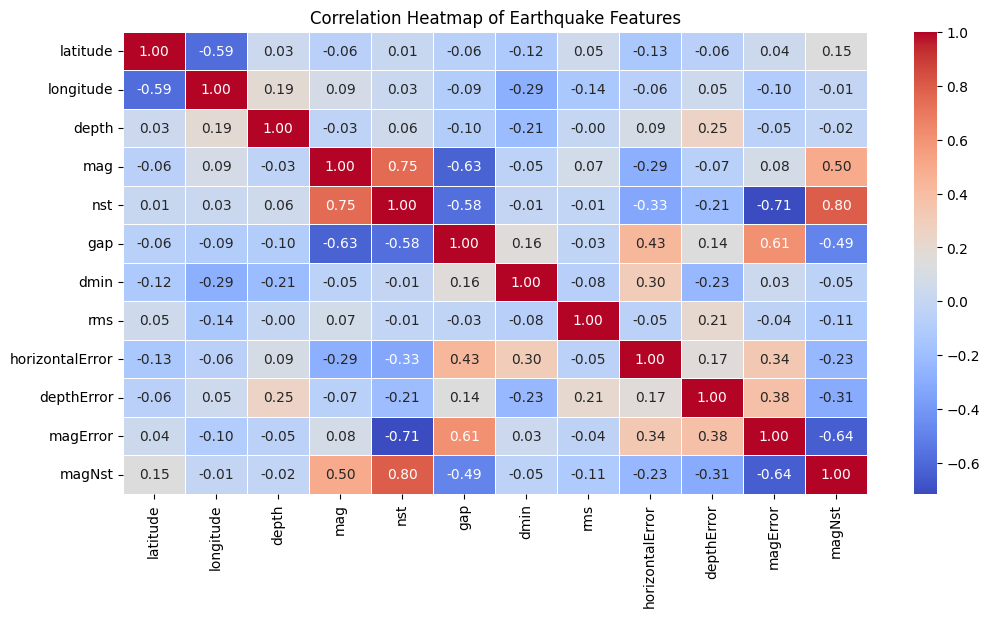

In [10]:
corr_matrix = df.select_dtypes(include=['float64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Earthquake Features")
plt.show()

**Scatter plot: Depth vs. Magnitude**

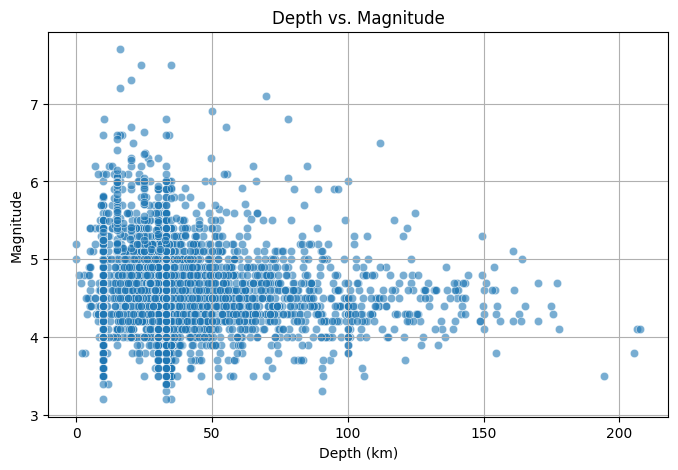

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["depth"], y=df["mag"], alpha=0.6)
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Depth vs. Magnitude")
plt.grid(True)
plt.show()

**Scatter plot: Number of Stations vs. Magnitude**

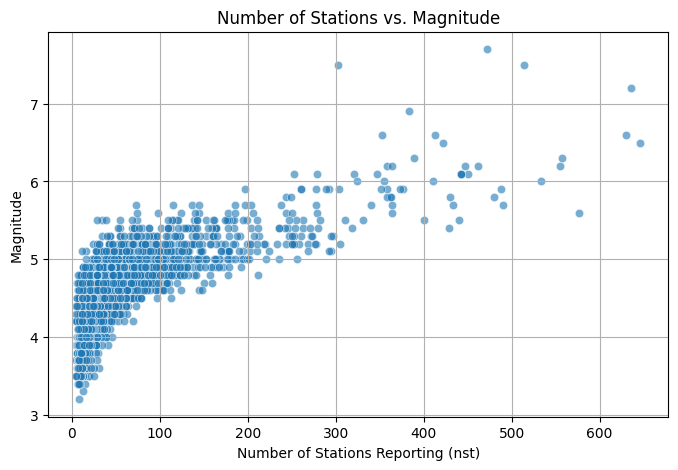

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["nst"], y=df["mag"], alpha=0.6)
plt.xlabel("Number of Stations Reporting (nst)")
plt.ylabel("Magnitude")
plt.title("Number of Stations vs. Magnitude")
plt.grid(True)
plt.show()

**Histogram: Magnitude Distribution**

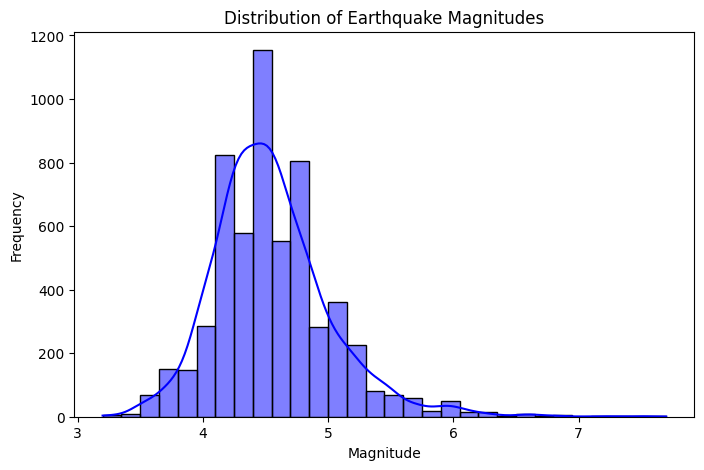

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["mag"], bins=30, kde=True, color="blue")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Distribution of Earthquake Magnitudes")
plt.show()

**Boxplot: Magnitude by Magnitude Type**

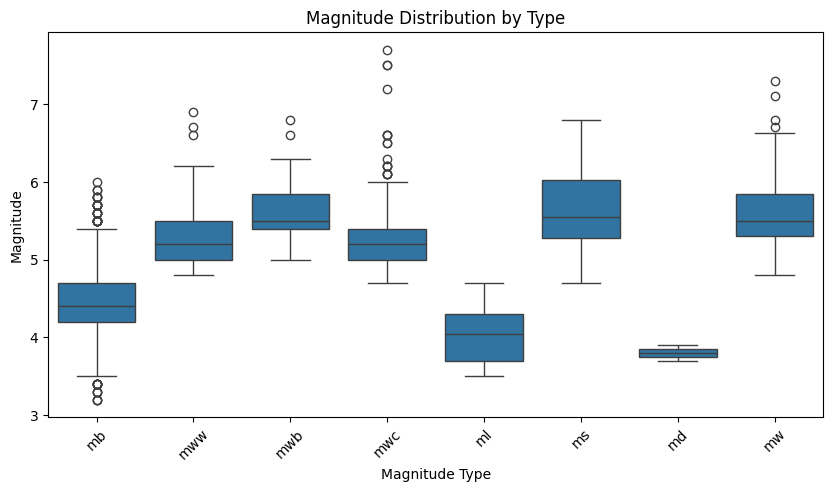

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["magType"], y=df["mag"])
plt.xlabel("Magnitude Type")
plt.ylabel("Magnitude")
plt.title("Magnitude Distribution by Type")
plt.xticks(rotation=45)
plt.show()

**Convert 'time' column to datetime format for time-series analysis**

/tmp/ipython-input-1019807005.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["time"].dt.to_period("M")


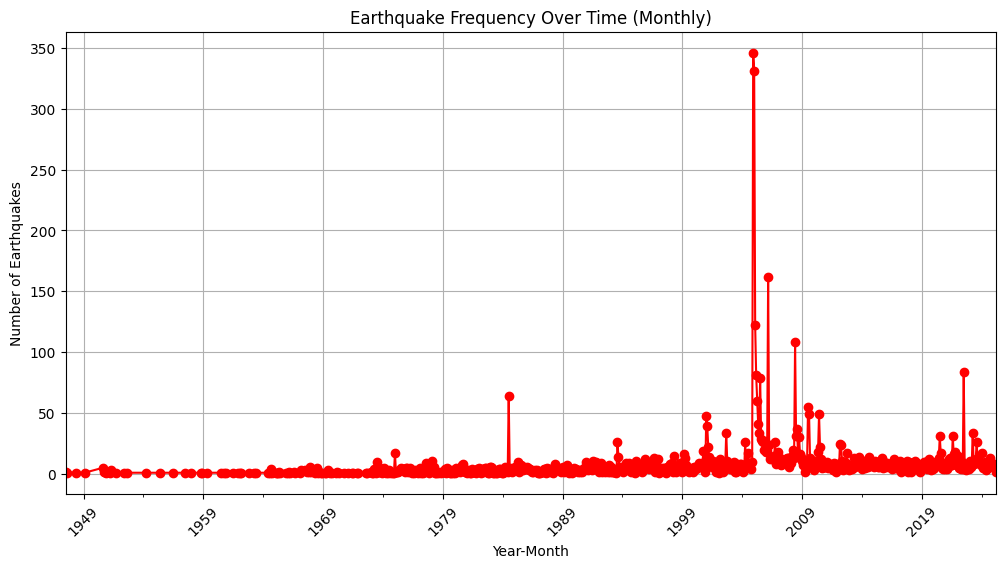

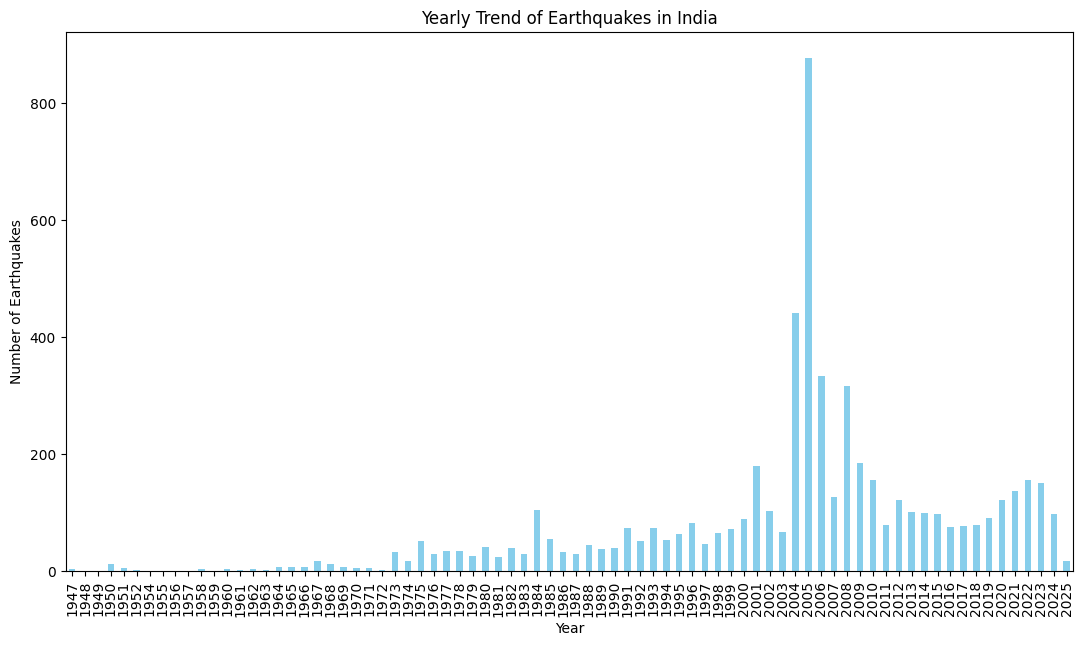

In [15]:
df["time"] = pd.to_datetime(df["time"])

# Extract year and month for trend analysis
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.to_period("M")

# Plot earthquake frequency over time (monthly trend)
plt.figure(figsize=(12, 6))
df["month"].value_counts().sort_index().plot(kind="line", marker="o", color="red")
plt.xlabel("Year-Month")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Frequency Over Time (Monthly)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Yearly trend analysis
plt.figure(figsize=(13, 7))
df["year"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Trend of Earthquakes in India")
plt.show()

**Plot earthquake locations using scatter plot**

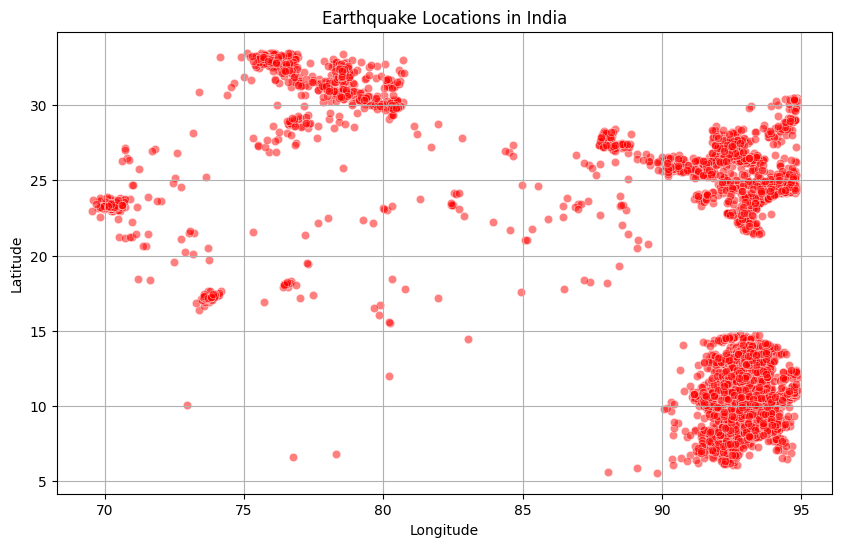

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["longitude"], y=df["latitude"], alpha=0.5, color="red")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Locations in India")
plt.grid(True)
plt.show()

**Group by 'place' and calculate average magnitude**

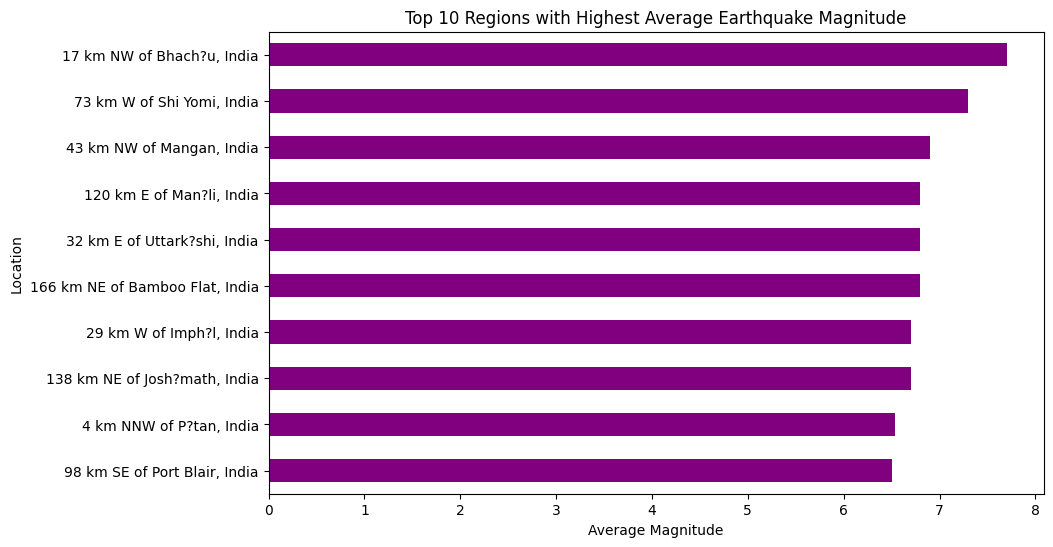

In [17]:
top_regions = df.groupby("place")["mag"].mean().sort_values(ascending=False).head(10)

# Plot top 10 regions with highest average earthquake magnitude
plt.figure(figsize=(10, 6))
top_regions.plot(kind="barh", color="purple")
plt.xlabel("Average Magnitude")
plt.ylabel("Location")
plt.title("Top 10 Regions with Highest Average Earthquake Magnitude")
plt.gca().invert_yaxis()
plt.show()